## Dataset overview ##

<p style="color:blue;"> First lets Import the required libraries </p>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

<p style="color:blue;"> After importing the required libraries we will now import the dataset </p>

In [ ]:
# Read csv file
df_mood_smartphone = pd.read_csv("dataset_mood_smartphone.csv")  

# Remove the 'Unnamed: 0' column
df_mood_smartphone.drop('Unnamed: 0', axis=1, inplace=True)

df_mood_smartphone.head(10) # Glance of the dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,AS14.01,2014-03-21 15:00:00.000,mood,7.0


<p style="color:blue;"> Lets now describe the data </p>

##### The dataset has the following columns below:
1. id  &ensp; - &ensp;  unique identifier of user.
2. time  &ensp; - &ensp;  Date with time record was made.
3. variable  &ensp; - &ensp;  age in years.
- mood &ensp; - &ensp; The mood scored by the user on a scale of 1-10
- circumplex.arousal &ensp; - &ensp; The arousal scored by the user, on a scale between -2 to 2
- circumplex.valence &ensp; - &ensp; The valence scored by the user, on a scale between -2 to 2
- activity &ensp; - &ensp; Activity score of the user (number between 0 and 1)
- screen &ensp; - &ensp; Duration of screen activity (time)
- call &ensp; - &ensp; Call made (indicated by a 1)
- sms &ensp; - &ensp; SMS sent (indicated by a 1)
- appCat.builtin &ensp; - &ensp; Duration of usage of builtin apps (time)
- appCat.communication &ensp; - &ensp; Duration of usage of communication apps (time)
- appCat.entertainment &ensp; - &ensp; Duration of usage of entertainment apps (time)
- appCat.finance &ensp; - &ensp; Duration of usage of finance apps (time)
- appCat.game &ensp; - &ensp; Duration of usage of game apps (time)
- appCat.office &ensp; - &ensp; Duration of usage of office apps (time)
- appCat.other &ensp; - &ensp; Duration of usage of other apps (time)
- appCat.social &ensp; - &ensp; Duration of usage of social apps (time)
- appCat.travel &ensp; - &ensp; Duration of usage of travel apps (time)
- appCat.unknown &ensp; - &ensp; Duration of usage of unknown apps (time)
- appCat.utilities &ensp; - &ensp; Duration of usage of utilities apps (time)
- appCat.weather &ensp; - &ensp; Duration of usage of weather apps (time)
4. value  &ensp; - &ensp;  a number associated to variable.

## EXPLORATORY DATA ANALYSIS (EDA) ## 

In [ ]:
# Check the number of records and attributes
num_records, num_attributes = df_mood_smartphone.shape
print(f"Number of records: {num_records}")
print(f"Number of attributes: {num_attributes}")

Number of records: 376912
Number of attributes: 4


In [ ]:
#tstatistical information about the data
print(df_mood_smartphone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        376912 non-null  object 
 1   time      376912 non-null  object 
 2   variable  376912 non-null  object 
 3   value     376710 non-null  float64
dtypes: float64(1), object(3)
memory usage: 11.5+ MB
None


In [ ]:
# Find the minimum and maximum values for each column
min_values = df_mood_smartphone.min()
max_values = df_mood_smartphone.max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
id                          AS14.01
time        2014-02-17 07:00:52.197
variable                   activity
value                    -82798.871
dtype: object

Maximum values:
id                          AS14.33
time        2014-06-09 00:00:00.000
variable                        sms
value                     33960.246
dtype: object


In [ ]:
# Summary statistics
print(df_mood_smartphone.describe())

               value
count  376710.000000
mean       40.665313
std       273.726007
min    -82798.871000
25%         2.025000
50%         7.029000
75%        29.356000
max     33960.246000


In [ ]:
# Check for missing values
print(df_mood_smartphone.isnull().sum())

id            0
time          0
variable      0
value       202
dtype: int64


In [ ]:
# Get unique values for the 'variable' column
unique_variables = df_mood_smartphone['variable'].unique()

# Print the unique values
print(unique_variables)


['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [ ]:
# lets now filter the DataFrame to select rows for a specific ID
rows_for_id = df_mood_smartphone[(df_mood_smartphone['id'] == 'AS14.01') & (df_mood_smartphone['variable'] == 'mood')]

# Print the filtered rows
print(rows_for_id.head())


        id                     time variable  value
0  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4  AS14.01  2014-02-27 09:00:00.000     mood    6.0


In [ ]:
#Lets check the rows with variable mood

# fetching all rows with variable mood
mood_filtered  = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood']

# all the userid list
ids_list = mood_filtered ['id'].tolist()
ids = set()

# Iterate through each dictionary in the list
for item in ids_list:
    # Add the ID to the set
    ids.add(item)

# Convert the set to a list
print(sorted(ids))

['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07', 'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15', 'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24', 'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']


## DATA CLEANING ## 

<p style="color:blue;"> Lets drop the rows with missing values because they are not alot </p>

In [ ]:
# Count the number of missing values in each column
missing_values = df_mood_smartphone.isnull().sum()

# Calculate the total number of values in each column
total_values = df_mood_smartphone.shape[0]

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / total_values) * 100

# Create a DataFrame to display the results
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_data_df)


          Missing Values  Total Values  Percentage Missing
id                     0        376912            0.000000
time                   0        376912            0.000000
variable               0        376912            0.000000
value                202        376912            0.053593


In [ ]:
# Drop missing values
df_mood_smartphone.dropna(inplace=True)

In [ ]:
print(df_mood_smartphone.isnull().sum())

id          0
time        0
variable    0
value       0
dtype: int64


<p style="color:blue;"> Lets now check for outliers </p>

<Figure size 1200x800 with 0 Axes>

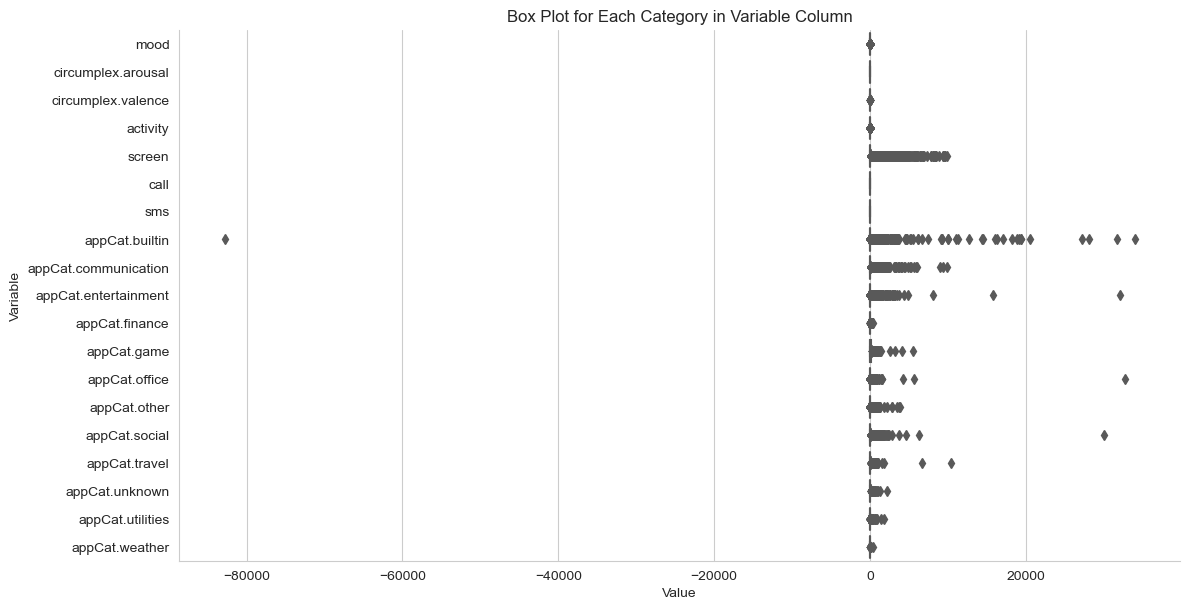

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create box plots for each category in the "variable" column
plt.figure(figsize=(12, 8))
sns.catplot(x="value", y="variable", kind="box", data=df_mood_smartphone, height=6, aspect=2, palette="Set2")
plt.title('Box Plot for Each Category in Variable Column')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()


Since "appCat.builtin" represents the duration of usage of built-in apps, it's essential to choose a replacement value that accurately reflects the typical duration of usage for this category. We will replacement the only negative outliers with the median because it is robust measure of central tendency that is less sensitive to outliers compared to for example the mean. It represents the middle value when the data is sorted in ascending order. Using the median as a replacement would ensure that the outlier does not overly influence the replacement value.

<p style="color:blue;"> Lets now deal with only the negative outliers </p>

<Figure size 1200x800 with 0 Axes>

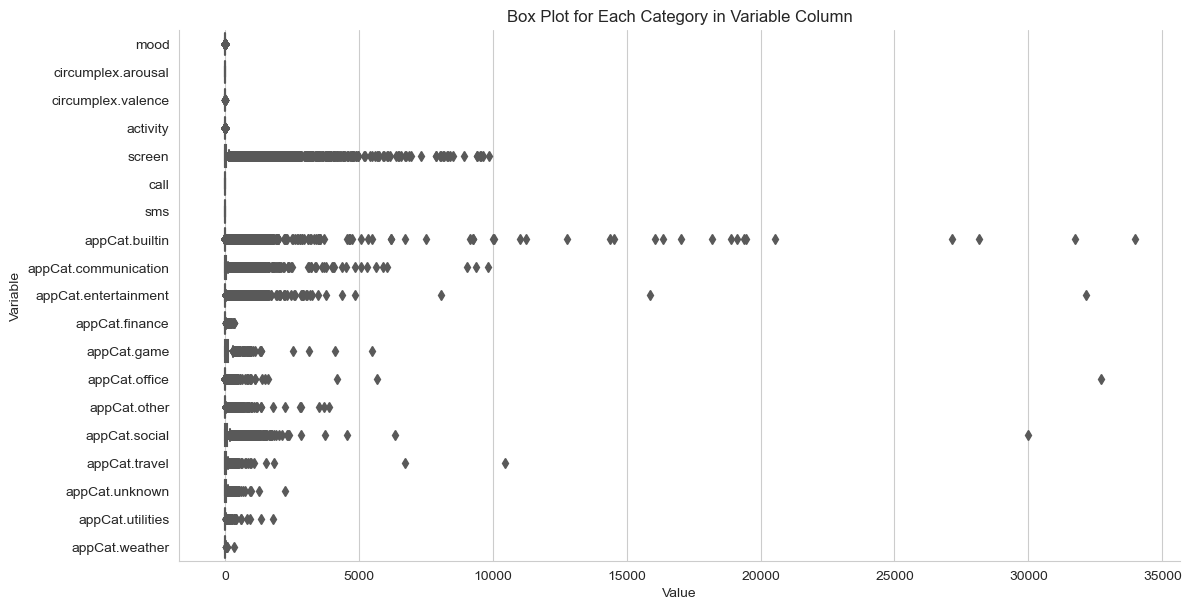

In [ ]:
# Calculate the median of appCat.builtin
builtin_median = df_mood_smartphone[df_mood_smartphone['variable'] == 'appCat.builtin']['value'].median()

# Replace outliers with the median
outlier_threshold = 0
df_mood_smartphone.loc[(df_mood_smartphone['variable'] == 'appCat.builtin') & (df_mood_smartphone['value'] < outlier_threshold), 'value'] = builtin_median

# Set the style of the plot
sns.set_style("whitegrid")

# Create box plots for each category in the "variable" column
plt.figure(figsize=(12, 8))
sns.catplot(x="value", y="variable", kind="box", data=df_mood_smartphone, height=6, aspect=2, palette="Set2")
plt.title('Box Plot for Each Category in Variable Column')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()


## DATA VISUALISATION ##

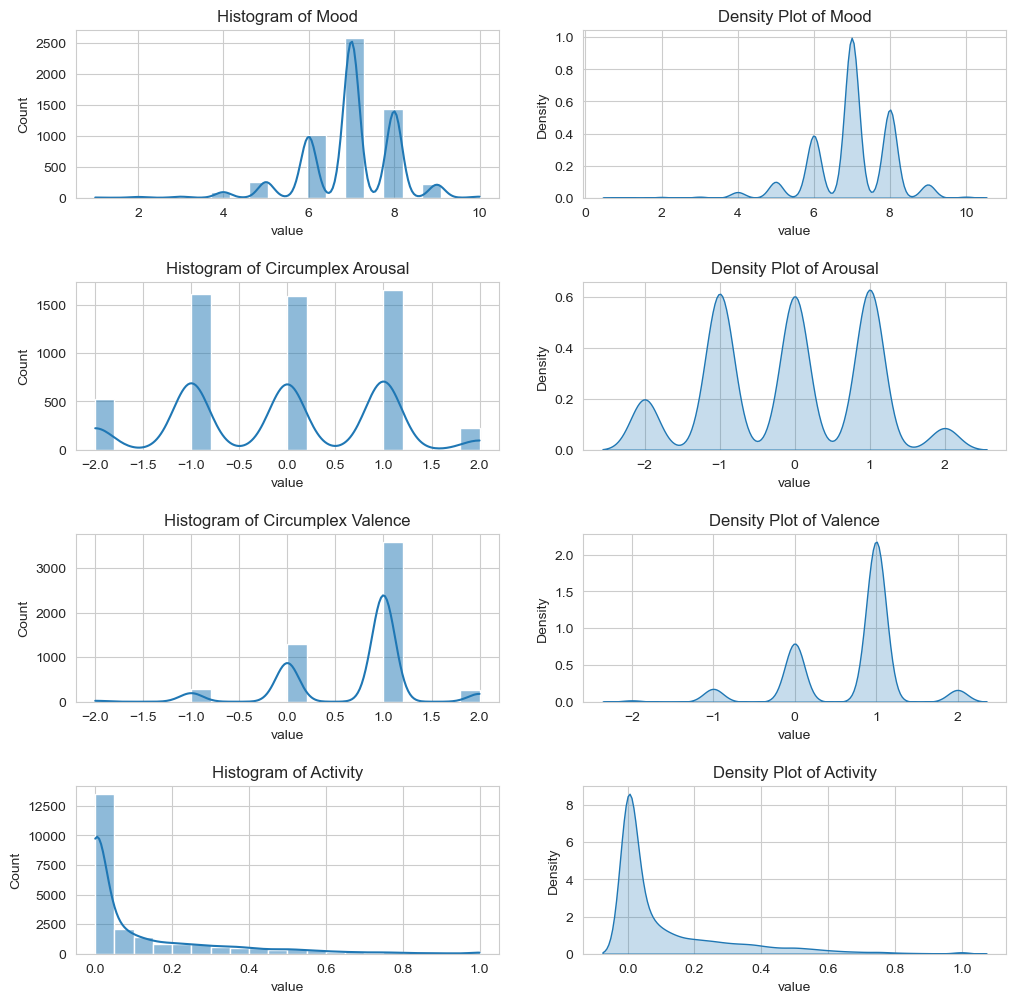

In [ ]:
arousal_filtered = df_mood_smartphone[df_mood_smartphone['variable'] == 'circumplex.arousal']
valence_filtered = df_mood_smartphone[df_mood_smartphone['variable'] == 'circumplex.valence']
activity_filtered = df_mood_smartphone[df_mood_smartphone['variable'] == 'activity']

# Set up the figure and axes
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Plot histograms for 'mood', 'circumplex.arousal', and 'circumplex.valence' and 'activity'
sns.histplot(data=mood_filtered, x='value', bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histogram of Mood')

sns.histplot(data=arousal_filtered, x='value', bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram of Circumplex Arousal')

sns.histplot(data=valence_filtered, x='value', bins=20, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Histogram of Circumplex Valence')

sns.histplot(data=activity_filtered, x='value', bins=20, kde=True, ax=axs[3, 0])
axs[3, 0].set_title('Histogram of Activity')

# Plot density plots for 'mood', 'circumplex.arousal', and 'circumplex.valence' and 'activity'
sns.kdeplot(data=mood_filtered, x='value', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Density Plot of Mood')

sns.kdeplot(data=arousal_filtered, x='value', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Density Plot of Arousal')

sns.kdeplot(data=valence_filtered, x='value', fill=True, ax=axs[2, 1])
axs[2, 1].set_title('Density Plot of Valence')

sns.kdeplot(data=activity_filtered, x='value', fill=True, ax=axs[3, 1])
axs[3, 1].set_title('Density Plot of Activity')

plt.subplots_adjust(hspace=0.5)

plt.show()

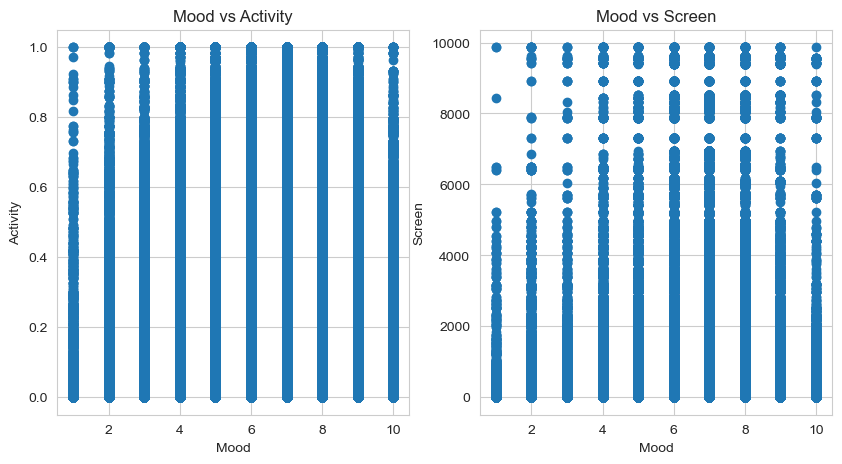

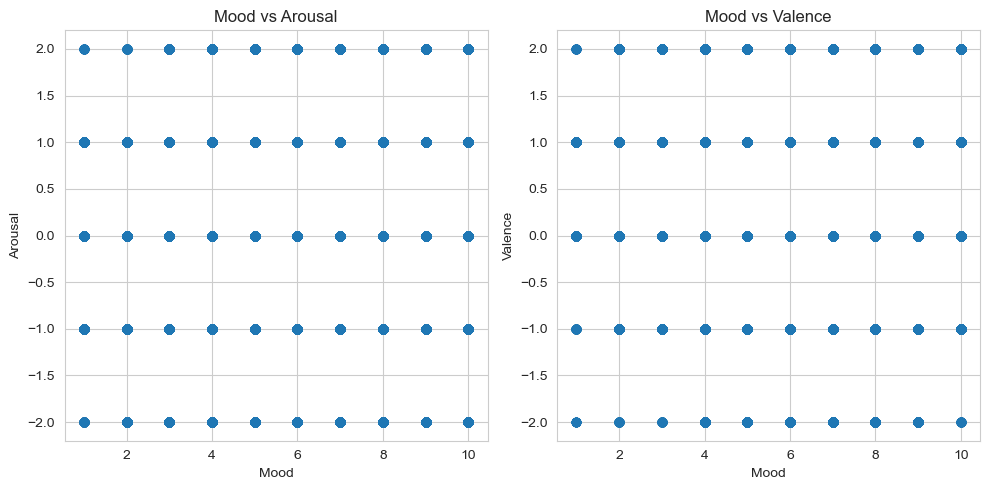

In [ ]:
screen_usage = df_mood_smartphone[df_mood_smartphone['variable'] == 'screen']

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

merged_mood_activity = mood_filtered.merge(activity_filtered, on='id')
merged_mood_screen = mood_filtered.merge(screen_usage, on='id')
merged_mood_arousal = mood_filtered.merge(arousal_filtered, on='id')
merged_mood_valence = mood_filtered.merge(valence_filtered, on='id')

# Scatter plot for 'mood' vs 'activity'
axs[0].scatter(merged_mood_activity['value_x'], merged_mood_activity['value_y'])
axs[0].set_xlabel('Mood')
axs[0].set_ylabel('Activity')
axs[0].set_title('Mood vs Activity')

# Scatter plot for 'mood' vs 'screen'
axs[1].scatter(merged_mood_screen['value_x'], merged_mood_screen['value_y'])
axs[1].set_xlabel('Mood')
axs[1].set_ylabel('Screen')
axs[1].set_title('Mood vs Screen')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for 'mood' vs 'circumplex.arousal'
axs[0].scatter(merged_mood_arousal['value_x'], merged_mood_arousal['value_y'])
axs[0].set_xlabel('Mood')
axs[0].set_ylabel('Arousal')
axs[0].set_title('Mood vs Arousal')

axs[1].scatter(merged_mood_valence['value_x'], merged_mood_valence['value_y'])
axs[1].set_xlabel('Mood')
axs[1].set_ylabel('Valence')
axs[1].set_title('Mood vs Valence')

plt.tight_layout()
plt.show()

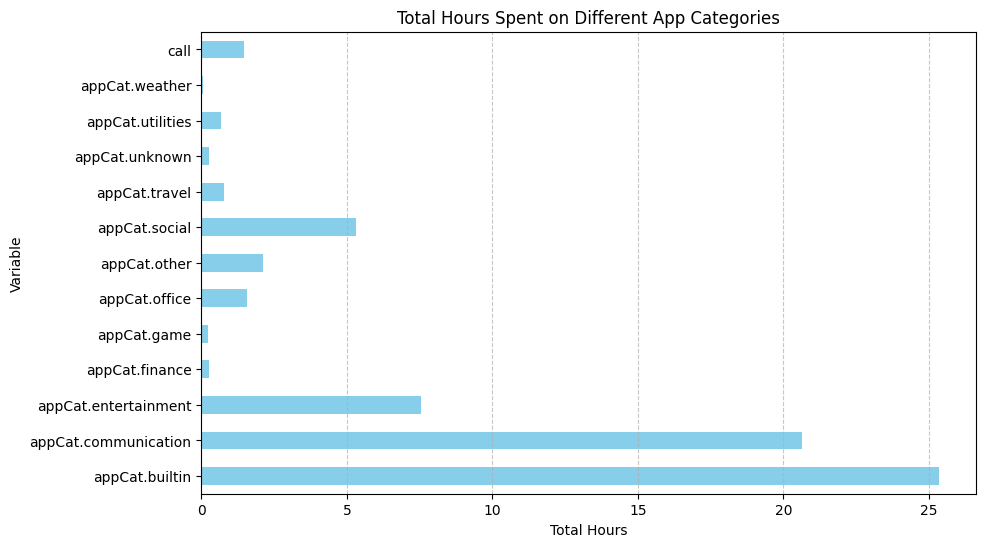

In [16]:
# Convert 'time' column to datetime
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

filtered_df = df_mood_smartphone[df_mood_smartphone['variable'].str.startswith('appCat') | 
                                  (df_mood_smartphone['variable'] == 'call')]

# Calculate the total hours spent on each variable
variable_hours = filtered_df.groupby('variable')['time'].count() / 3600  # Converting seconds to hours

# Plotting
plt.figure(figsize=(10, 6))
variable_hours.plot(kind='barh', color='skyblue')  # Horizontal bar plot
plt.title('Total Hours Spent on Different App Categories')
plt.xlabel('Total Hours')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid along the x-axis
plt.show()


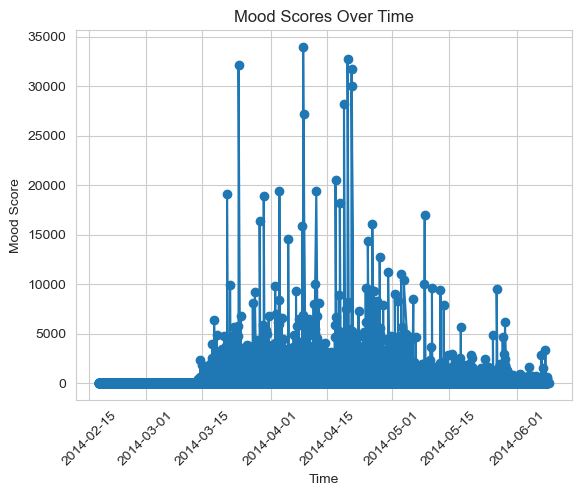

In [22]:
# Convert 'time' column to datetime
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Plot mood scores over time
plt.plot(df_mood_smartphone['time'], df_mood_smartphone['value'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Mood Score')
plt.title('Mood Scores Over Time')
plt.xticks(rotation=45)
plt.show()

## FEATURE ENGINEERING(using  last five days as predictor) ## 

In [23]:
# Convert time column to datetime format
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Filter data to include only mood values
df_mood = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood'].copy()

# Aggregate data to calculate features for each subject and each day
df_agg = df_mood.groupby(['id', pd.Grouper(key='time', freq='D')])['value'].agg(['mean']).reset_index()
df_agg.rename(columns={'mean': 'avg_mood'}, inplace=True)

# Shift the time column by one day to predict mood of the next day
df_agg['time'] = df_agg['time'] + pd.DateOffset(days=1)

# Merge with the original dataframe to get the mood of the next day
df_merged = pd.merge(df_agg, df_agg[['id', 'time', 'avg_mood']], how='left', left_on=['id', 'time'], right_on=['id', 'time'], suffixes=('', '_next'))

# Shift the avg_mood column by 5 days to get the average mood of the last five days
df_merged['avg_mood_last_5_days'] = df_merged.groupby('id')['avg_mood'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())

# Drop rows where 'avg_mood_last_5_days' is NaN
df_merged.dropna(inplace=True)
df_merged

,id,time,avg_mood,avg_mood_next,avg_mood_last_5_days
1,AS14.01,2014-02-28,6.333333,6.333333,6.250000
2,AS14.01,2014-03-22,6.200000,6.200000,6.291667
3,AS14.01,2014-03-23,6.400000,6.400000,6.261111
4,AS14.01,2014-03-24,6.800000,6.800000,6.295833
5,AS14.01,2014-03-25,6.000000,6.000000,6.396667
...,...,...,...,...,...
1263,AS14.33,2014-05-28,6.200000,6.200000,5.926667
1264,AS14.33,2014-05-29,8.200000,8.200000,6.016667
1265,AS14.33,2014-05-30,7.000000,7.000000,6.490000
1266,AS14.33,2014-05-31,6.800000,6.800000,6.610000


## MODEL THE DATA USING SVC and RNN (AVERAGE last five days as predictor) ##

In [24]:
# Define the threshold for mood classification
threshold = 5

# Convert mood values to categorical labels
df_merged['mood_class'] = df_merged['avg_mood_next'].apply(lambda x: 'positive_mood' if x >= threshold else 'negative_mood')

# Encode the labels to easily work for both models
label_encoder = LabelEncoder()
df_merged['mood_class_encoded'] = label_encoder.fit_transform(df_merged['mood_class'])


In [30]:
# Define features (X) and target variable (y) for SVC
X_svc = df_merged[['avg_mood_last_5_days']]
y_svc = df_merged['mood_class_encoded']

# Split the data into training and testing sets for SVC
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, test_size=0.2, random_state=42)

# Train Support Vector Classifier (SVC) with best parameters
svc_classifier = SVC(C=0.1, gamma='scale', kernel='rbf')
svc_classifier.fit(X_train_svc, y_train_svc)

# Make predictions for SVC
svc_pred = svc_classifier.predict(X_test_svc)

# Calculate accuracy for SVC
svc_accuracy = accuracy_score(y_test_svc, svc_pred)

# Calculate precision, recall, and F1-score for SVC
svc_precision = precision_score(y_test_svc, svc_pred)
svc_recall = recall_score(y_test_svc, svc_pred)
svc_f1_score = f1_score(y_test_svc, svc_pred)

# Print the metrics
print("SVC Metrics:")
print("SVC Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1-score:", svc_f1_score)


SVC Metrics:
SVC Accuracy: 0.9959839357429718
Precision: 0.9959839357429718
Recall: 1.0
F1-score: 0.9979879275653923


In [27]:
# Define features (X) and target variable (y) for RNN
X_rnn = df_merged[['avg_mood_last_5_days']].values
y_rnn = df_merged['mood_class_encoded'].values

# Split the data into training and testing sets for RNN
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Reshape the data for input to RNN
X_train_rnn = np.expand_dims(X_train_rnn, axis=2)
X_test_rnn = np.expand_dims(X_test_rnn, axis=2)

# Define the RNN model architecture
rnn_model  = Sequential()
rnn_model .add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model .add(LSTM(units=64))
rnn_model .add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model .compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32)

# Make predictions for RNN
rnn_pred_probs = rnn_model.predict(X_test_rnn)

# Convert probabilities to classes based on a threshold
threshold = 0.5  
rnn_pred_classes = (rnn_pred_probs > threshold).astype(int)

# Evaluate the performance for RNN
rnn_precision = precision_score(y_test_rnn, rnn_pred_classes)
rnn_recall = recall_score(y_test_rnn, rnn_pred_classes)
rnn_f1_score = f1_score(y_test_rnn, rnn_pred_classes)

# Print the metrics
print("RNN Metrics:")
print("RNN Accuracy:", rnn_accuracy)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1-score:", rnn_f1_score)






Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9904 - loss: 0.5316
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9889 - loss: 0.2571
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.1320
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0932
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0784
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0545
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9860 - loss: 0.0719
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9900 - loss: 0.0554
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9879 - loss: 0.0619
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0703
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RNN Metrics:
RNN Accuracy: 0.9959839357429718
Precision: 0.9959839357429718
Recall: 1.0
F1-score: 0.9979879275653923


## Grid Search For Best Hyper Parameters SVC ## 

In [28]:
# Define parameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Instantiate SVC
svc_classifier = SVC()

# Perform grid search
svc_grid_search = GridSearchCV(estimator=svc_classifier, param_grid=svc_param_grid, cv=5, scoring='accuracy', verbose=2)
svc_grid_search.fit(X_train_svc, y_train_svc)

# Get the best parameters and best score
print("Best Parameters for SVC:", svc_grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.6s
[CV] END ....................C=0.1, gamma=scale,

# Svc with best parameters #

In [29]:
# Define features (X) and target variable (y) for SVC
X_svc = df_merged[['avg_mood_last_5_days']]
y_svc = df_merged['mood_class_encoded']

# Split the data into training and testing sets for SVC
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, test_size=0.2, random_state=42)

# Train Support Vector Classifier (SVC) with best parameters
svc_classifier = SVC(C=0.1, gamma='scale', kernel='linear')
svc_classifier.fit(X_train_svc, y_train_svc)

# Make predictions for SVC
svc_pred = svc_classifier.predict(X_test_svc)

# Calculate accuracy for SVC
svc_accuracy = accuracy_score(y_test_svc, svc_pred)

# Calculate precision, recall, and F1-score for SVC
svc_precision = precision_score(y_test_svc, svc_pred)
svc_recall = recall_score(y_test_svc, svc_pred)
svc_f1_score = f1_score(y_test_svc, svc_pred)

# Print the metrics
print("SVC Metrics:")
print("SVC Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1-score:", svc_f1_score)


SVC Metrics:
SVC Accuracy: 0.9959839357429718
Precision: 0.9959839357429718
Recall: 1.0
F1-score: 0.9979879275653923


## CONCLUSION ## 

The Support Vector Classifier (SVC) demonstrated exceptional performance, achieving an accuracy of 99.60% before hyperparameter tuning. This high accuracy indicated that the model was already performing remarkably well with its default parameters. However, after conducting grid search to fine-tune the hyperparameters, the SVC's accuracy remained unchanged at 99.60%. This outcome suggests that the default parameters were optimal for the dataset, and further adjustments did not result in improvements.

On the contrary, the Recurrent Neural Network (RNN) consistently exhibited an accuracy of 99.60% throughout the evaluation process. This consistent performance indicates the RNN's robustness and effectiveness in capturing the underlying patterns in the data.

In summary, while the SVC showcased impressive performance both before and after hyperparameter tuning, the RNN maintained consistent accuracy levels. This suggests both models reliability as a predictive models for mood classification.